# Exploratory Data Analysis
Determine what the coordinates and bounds of the netcdf file are.

In [1]:
import xarray as xr
import numpy as np

file = '../data/sos_Omon_HadCM3_past1000_r1i1p1_085001-185012.nc'
#file = "https://esgf.ceda.ac.uk/thredds/fileServer/esg_dataroot/pmip3/output/UOED/HadCM3/past1000/mon/ocean/Omon/r1i1p1/v20130313/sos/sos_Omon_HadCM3_past1000_r1i1p1_085001-185012.nc#mode=bytes"
ds = xr.load_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (time: 12012, bnds: 2, lat: 144, lon: 288)
Coordinates:
  * time       (time) object 0850-01-16 00:00:00 ... 1850-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 0850-01-01 00:00:00 ... 1851-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.75 -88.75 ... 88.75 88.75 90.0
    lon_bnds   (lon, bnds) float64 -0.625 0.625 0.625 ... 358.1 358.1 359.4
    sos        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/28)
    institution:            University of Edinburgh, School of Geosciences.
    institute_id:           UOED
    experiment_id:          past1000
    source:                 HadCM3 - Hadley Centre Coupled Model Version 3 (2...
    model_id:               HadCM3
    forcing:                GHG,Oz,LU,Sl,Vl
    ...                     ...
    table_id:               Table Omon (22 March 2012) 06bfa836151fd3ddc4a5bb...
    title:                  HadCM3 model output prepared for PMIP3 last mille...
    parent_experiment:      N/A
    modeling_realm:         ocean
    realization:            1
    cmor_version:           2.8.1

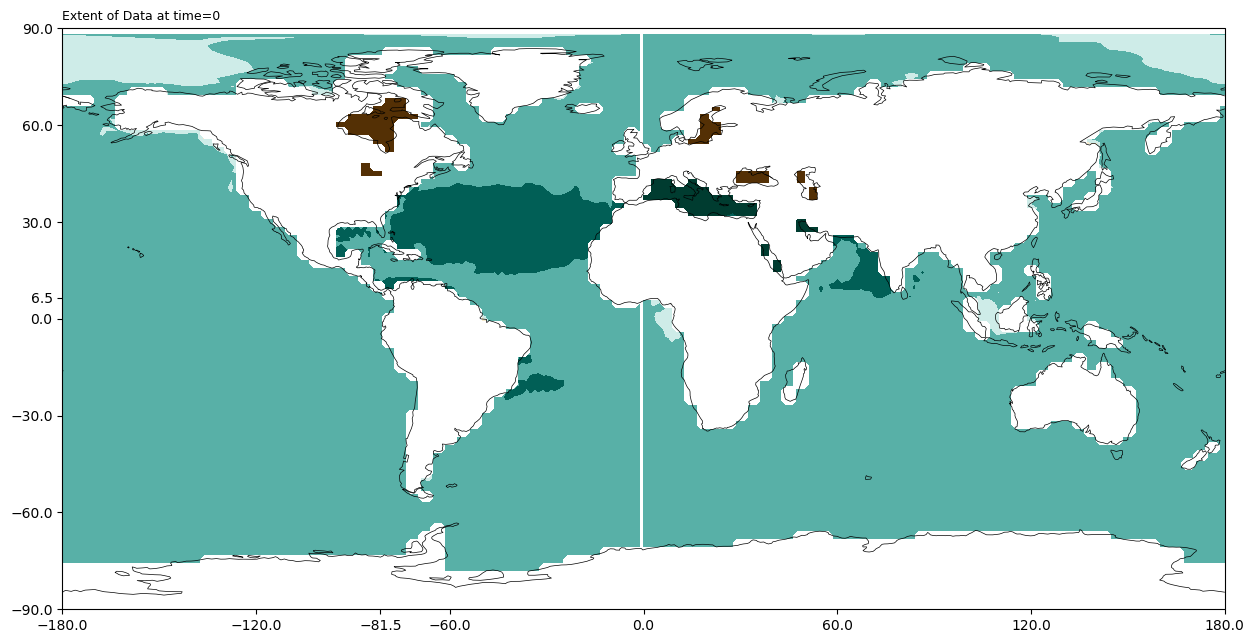

In [69]:
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

sos2d = ds.sos[0,:,:]

fig = plt.figure(figsize=(15,15))
ax=fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([-180,180,-90,90],projection)
ax.add_feature(cfeature.COASTLINE,lw=.5)
ax.set_xticks([-180,-120,-60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
cmap=plt.cm.BrBG
pc=ax.contourf(ds.lon,ds.lat,sos2d,transform=projection,cmap=cmap,extend='both')
ttitle='Extent of Data at time=0'
ax.set_title(ttitle,loc='left',fontsize=9)
plt.show()

Time is in month increments from 0850-01 to 1850-12

Latitude and longitude increase by 1.25 - as such, don't always line up with longitude latitude values. As such, 'method='nearest'' can be used to get closest value. Coverage is global, although missing near coast.

In [2]:
ds.sos.sel(lon=0, lat=0, method='nearest')

<xarray.DataArray 'sos' (time: 12012)>
array([32.670372, 31.779705, 31.497625, ..., 34.72518 , 34.86721 ,
       35.151375], dtype=float32)
Coordinates:
  * time     (time) object 0850-01-16 00:00:00 ... 1850-12-16 00:00:00
    lat      float64 0.625
    lon      float64 0.0
Attributes:
    standard_name:     sea_surface_salinity
    long_name:         Sea Surface Salinity
    units:             psu
    original_name:     mo: m02s00i102*1000.+35.
    cell_methods:      time: mean
    cell_measures:     area: areacello
    history:           2013-03-01T17:38:33Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [3]:
import pandas as pd
cores = pd.read_table('../data/cores.txt')
cores

,Core,Depth,Coarse Fraction,Lat,Long,Ocean
0,RC08-077 PC A,1889,20%,-36.5,177.5,Pacific
1,RC09-127 PC,1533,70%,-34.5,167.5,Pacific
2,RC09-128 PC,1234,90%,-36.5,166.5,Pacific
3,RC11-021 PC A,4021,40%,-17.5,-35.5,Atlantic
4,RC12-026 PC A,1618,3-8%,6.5,-81.5,Pacific
5,RC12-028 PC,1368,25%,8.5,-85.5,Pacific
6,RC12-340 PC A,3012,15-25%,12.5,90.5,Indian
7,RC12-340 PC,3012,15-25%,12.5,90.5,Indian
8,RC12-341 PC,2988,30-40%,13.5,89.5,Indian
9,RC12-343 PC A,2666,10-25%,15.5,90.5,Indian


Longitude values in cores.txt are -180 to 180, whereas the netcdf files are in 0 to 360, so need to be transformed.

In [4]:
for x in range(cores.shape[0]):
    lon = cores.Long[x]
    if lon<0:
        lon = lon+360
        cores.loc[x,'Long'] = lon 
cores

,Core,Depth,Coarse Fraction,Lat,Long,Ocean
0,RC08-077 PC A,1889,20%,-36.5,177.5,Pacific
1,RC09-127 PC,1533,70%,-34.5,167.5,Pacific
2,RC09-128 PC,1234,90%,-36.5,166.5,Pacific
3,RC11-021 PC A,4021,40%,-17.5,324.5,Atlantic
4,RC12-026 PC A,1618,3-8%,6.5,278.5,Pacific
5,RC12-028 PC,1368,25%,8.5,274.5,Pacific
6,RC12-340 PC A,3012,15-25%,12.5,90.5,Indian
7,RC12-340 PC,3012,15-25%,12.5,90.5,Indian
8,RC12-341 PC,2988,30-40%,13.5,89.5,Indian
9,RC12-343 PC A,2666,10-25%,15.5,90.5,Indian


Determine method to extract max/min/avg values from netcdf at given coordinates

In [5]:
sss = ds.sos.sel(lat=10.5, lon=57.5, method='nearest')
sss.max('time').values.ravel()

array([36.34354782])

Add empty columns to dataframe for each summary statistic, then calculate summary statistic for given coordinates

In [6]:
cores['sss_max'] = np.nan  
cores['sss_min'] = np.nan
cores['sss_avg'] = np.nan
cores['sss_std'] = np.nan  
cores

,Core,Depth,Coarse Fraction,Lat,Long,Ocean,sss_max,sss_min,sss_avg,sss_std
0,RC08-077 PC A,1889,20%,-36.5,177.5,Pacific,NaN,NaN,NaN,NaN
1,RC09-127 PC,1533,70%,-34.5,167.5,Pacific,NaN,NaN,NaN,NaN
2,RC09-128 PC,1234,90%,-36.5,166.5,Pacific,NaN,NaN,NaN,NaN
3,RC11-021 PC A,4021,40%,-17.5,324.5,Atlantic,NaN,NaN,NaN,NaN
4,RC12-026 PC A,1618,3-8%,6.5,278.5,Pacific,NaN,NaN,NaN,NaN
5,RC12-028 PC,1368,25%,8.5,274.5,Pacific,NaN,NaN,NaN,NaN
6,RC12-340 PC A,3012,15-25%,12.5,90.5,Indian,NaN,NaN,NaN,NaN
7,RC12-340 PC,3012,15-25%,12.5,90.5,Indian,NaN,NaN,NaN,NaN
8,RC12-341 PC,2988,30-40%,13.5,89.5,Indian,NaN,NaN,NaN,NaN
9,RC12-343 PC A,2666,10-25%,15.5,90.5,Indian,NaN,NaN,NaN,NaN


In [7]:
for x in range(cores.shape[0]):
    lat = cores.Lat[x]
    lon = cores.Long[x]
    sss = ds.sos.sel(lon=lon, lat=lat, method='nearest')
    cores.loc[x,'sss_max'] = sss.max('time').values
    cores.loc[x,'sss_min'] = sss.min('time').values
    cores.loc[x,'sss_avg'] = np.average(sss.values)
    cores.loc[x,'sss_std'] = np.std(sss.values)
cores

,Core,Depth,Coarse Fraction,Lat,Long,Ocean,sss_max,sss_min,sss_avg,sss_std
0,RC08-077 PC A,1889,20%,-36.5,177.5,Pacific,34.623341,33.735313,34.188793,0.104765
1,RC09-127 PC,1533,70%,-34.5,167.5,Pacific,34.609867,33.525307,34.146862,0.131031
2,RC09-128 PC,1234,90%,-36.5,166.5,Pacific,34.506214,33.588894,34.140392,0.100933
3,RC11-021 PC A,4021,40%,-17.5,324.5,Atlantic,36.922333,34.884827,36.236736,0.223172
4,RC12-026 PC A,1618,3-8%,6.5,278.5,Pacific,34.700096,30.885647,33.992294,0.488302
5,RC12-028 PC,1368,25%,8.5,274.5,Pacific,35.110504,30.735626,33.862286,0.678081
6,RC12-340 PC A,3012,15-25%,12.5,90.5,Indian,36.269093,28.268797,33.698082,0.937768
7,RC12-340 PC,3012,15-25%,12.5,90.5,Indian,36.269093,28.268797,33.698082,0.937768
8,RC12-341 PC,2988,30-40%,13.5,89.5,Indian,36.269093,28.268797,33.698082,0.937768
9,RC12-343 PC A,2666,10-25%,15.5,90.5,Indian,36.008408,27.939711,33.003933,1.020912


Cores